<a href="https://colab.research.google.com/github/Nikhil-786-cmd/Nikhil-Project-/blob/main/Smart_Watch_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [74]:
df = pd.read_csv('Smart watch prices.csv')
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


# Data Preprocessing Part 1

In [75]:
#Check ther number of unique value
df.select_dtypes(include='object').nunique()

,0
Brand,42
Model,137
Operating System,35
Connectivity,5
Display Type,27
Resolution,36
Water Resistance (meters),7
Battery Life (days),30
Heart Rate Monitor,1
GPS,2


In [76]:
df.shape

(379, 13)

In [77]:
df.drop(columns='Model', inplace=True)
df.shape

(379, 12)

# Remove Dollar and Comma from Price (USD)

In [78]:
#remove '$' and comma from Price(USD) column
df['Price (USD)'] = df['Price (USD)'].str.replace(',', '').str.replace('$', '')

# Convert the Price(USD) column to numeric values
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'])
df.head()

,Brand,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,399.0
1,Samsung,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,249.0
2,Garmin,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,399.0
3,Fitbit,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,229.0
4,Fossil,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,299.0


In [79]:
df.dtypes

,0
Brand,object
Operating System,object
Connectivity,object
Display Type,object
Display Size (inches),float64
Resolution,object
Water Resistance (meters),object
Battery Life (days),object
Heart Rate Monitor,object
GPS,object


# Segment the Operating System

In [80]:
df['Operating System'].unique()

array(['watchOS', 'Wear OS', 'Garmin OS', 'Fitbit OS', 'HarmonyOS',
       'ColorOS', 'Amazfit OS', nan, 'Withings OS', 'Polar OS',
       'Tizen OS', 'Hybrid OS', 'Lite OS', 'Tizen', 'Suunto OS',
       'Proprietary OS', 'Proprietary', 'LiteOS', 'Android Wear',
       'MIUI for Watch', 'Custom OS', 'Fossil OS', 'MIUI', 'RTOS',
       'MyKronoz OS', 'Nubia OS', 'Mi Wear OS', 'Zepp OS', 'Realme OS',
       'Matrix OS', 'Android OS', 'Casio OS', 'Skagen OS', 'Timex OS',
       'MIUI For Watch', 'Android'], dtype=object)

In [81]:
def segment_os(os):
    if pd.isnull(os):
        return 'Unknown'
    elif 'watchOS' in os:
        return 'watchOS'
    elif 'Wear OS' in os or 'Android Wear' in os:
        return 'Wear OS'
    elif 'Garmin' in os:
        return 'Garmin OS'
    elif 'Fitbit' in os:
        return 'Fitbit OS'
    elif 'Tizen' in os:
        return 'Tizen OS'
    elif 'Proprietary' in os:
        return 'Proprietary OS'
    else:
        return 'Other'

df['Operating System'] = df['Operating System'].apply(segment_os)

<Axes: xlabel='Operating System'>

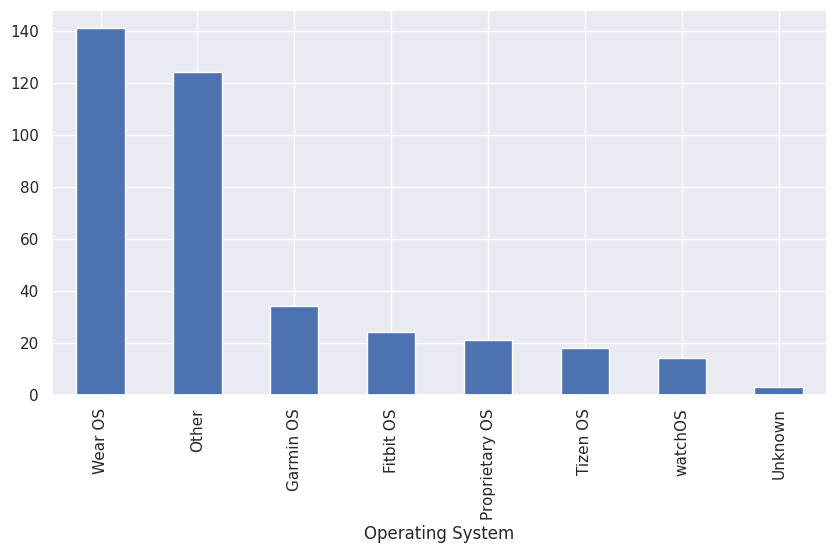

In [82]:
plt.figure(figsize=(10,5))
df['Operating System'].value_counts().plot(kind='bar')

# Segment the Display Type

In [83]:
df['Display Type'].unique()

array(['Retina', 'AMOLED', 'IPS LCD', nan, 'TFT LCD',
       'Memory-in-pixel (MIP)', 'Super AMOLED', 'LCD', 'Analog',
       'Transflective', 'OLED', 'Gorilla Glass', 'MIP', 'P-OLED',
       'transflective', 'PMOLED', 'TFT',
       'Sunlight-visible, transflective memory-in-pixel (MIP)', 'E-Ink',
       'E-ink', 'Sunlight-visible', 'Color Touch', 'IPS', 'Dual Layer',
       'TFT-LCD', 'STN LCD', 'Monochrome', 'Memory LCD'], dtype=object)

In [84]:
def segment_display_type(display_type):
    if pd.isnull(display_type):
        return 'Unknown'
    elif 'AMOLED' in display_type:
        return 'AMOLED'
    elif 'IPS LCD' in display_type or 'IPS' in display_type:
        return 'IPS LCD'
    elif 'LCD' in display_type:
        return 'LCD'
    elif 'OLED' in display_type:
        return 'OLED'
    elif 'TFT' in display_type:
        return 'TFT'
    elif 'E-Ink' in display_type or 'E-ink' in display_type:
        return 'E-Ink'
    elif 'PMOLED' in display_type:
        return 'PMOLED'
    elif 'STN LCD' in display_type:
        return 'STN LCD'
    elif 'Monochrome' in display_type:
        return 'Monochrome'
    elif 'Memory LCD' in display_type:
        return 'Memory LCD'
    else:
        return 'Other'

df['Display Type'] = df['Display Type'].apply(segment_display_type)

<Axes: xlabel='Display Type'>

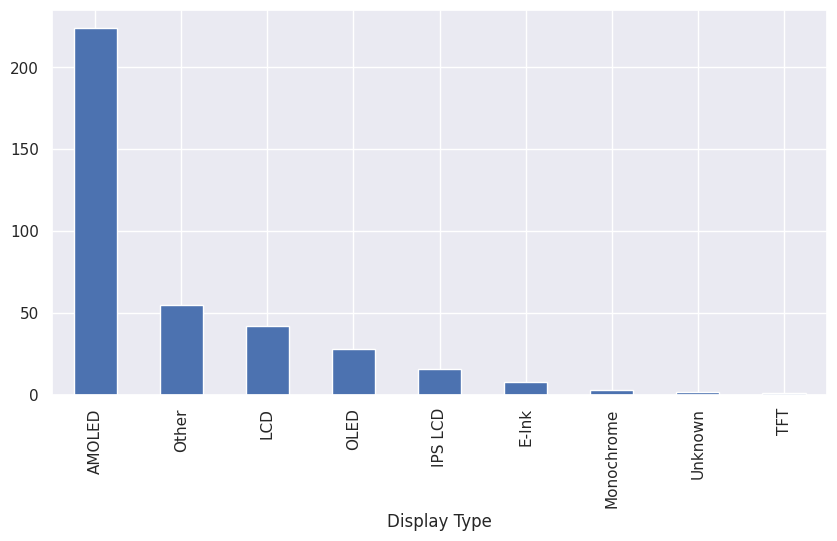

In [85]:
plt.figure(figsize=(10,5))
df['Display Type'].value_counts().plot(kind='bar')

# Remove Heart Rate Monitor because it only has 1 unique value

In [86]:
df.drop(columns='Heart Rate Monitor', inplace=True)
df.shape

(379, 11)

# Segment the Brand

In [87]:
df['Brand'].unique()

array(['Apple', 'Samsung', 'Garmin', 'Fitbit', 'Fossil', 'Huawei',
       'TicWatch', 'Oppo', 'Amazfit', 'Skagen', 'Withings', 'Timex',
       'Suunto', 'Mobvoi', 'Polar', 'Ticwatch', 'Xiaomi', 'Honor', 'LG',
       nan, 'Casio', 'OnePlus', 'Misfit', 'Moto', 'MyKronoz', 'Nubia',
       'Sony', 'Zepp', 'Realme', 'Matrix', 'Kate Spade', 'Diesel',
       'Michael Kors', 'Zeblaze', 'Kospet', 'Lemfo', 'TAG Heuer',
       'Montblanc', 'Asus', 'Emporio Armani', 'Polaroid', 'Motorola',
       'Nokia'], dtype=object)

In [88]:
def segment_brand(brand):
    if pd.isnull(brand):
        return 'Unknown'
    elif 'Apple' in brand:
        return 'Apple'
    elif 'Samsung' in brand:
        return 'Samsung'
    elif 'Fitbit' in brand:
        return 'Fitbit'
    elif 'Huawei' in brand:
        return 'Huawei'
    elif 'TicWatch' in brand or 'Ticwatch' in brand:
        return 'TicWatch'
    elif 'Polar' in brand:
        return 'Polar'
    elif 'Xiaomi' in brand:
        return 'Xiaomi'
    elif 'LG' in brand:
        return 'LG'
    elif 'Casio' in brand:
        return 'Casio'
    elif 'Moto' in brand or 'Motorola' in brand:
        return 'Motorola'
    elif 'Sony' in brand:
        return 'Sony'
    else:
        return 'Other'

df['Brand'] = df['Brand'].apply(segment_brand)

<Axes: xlabel='Brand'>

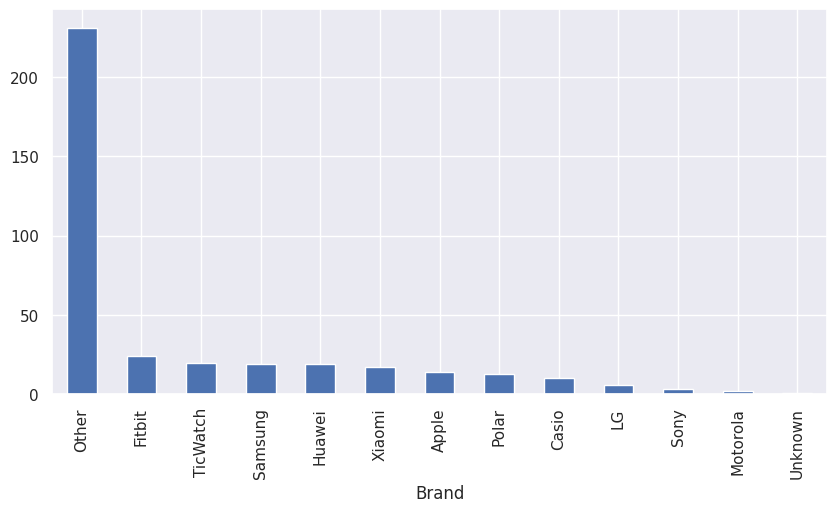

In [89]:
plt.figure(figsize=(10,5))
df['Brand'].value_counts().plot(kind='bar')

# Segment the Resolution

In [90]:
df.Resolution.unique()

array(['396 x 484', '450 x 450', '416 x 416', '336 x 336', '466 x 466',
       '360 x 360', '372 x 430', '454 x 454', nan, '240 x 240',
       '390 x 390', '394 x 324', '240 x 201', '368 x 448', '400 x 400',
       '324 x 394', '320 x 320', '348 x 442', '402 x 476', '480 x 480',
       '176 x 176', '300 x 300', '200 x 200', '280 x 280', '128 x 128',
       '240 x 198', '280 x 456', '328 x 328', '960 x 192', '348 x 250',
       '320 x 300', '320 x 302', '228 x 172', '160 x 160', '260 x 260',
       '126 x 36', '326 x 326'], dtype=object)

In [91]:
def segment_resolution(resolution):
    if pd.isnull(resolution):
        return 'Unknown'
    res = resolution.split(' x ')
    width = int(res[0])
    height = int(res[1])
    if width < 200 or height < 200:
        return 'Low'
    elif width < 400 or height < 400:
        return 'Medium'
    elif width < 800 or height < 800:
        return 'High'
    else:
        return 'Very high'

df['Resolution'] = df['Resolution'].apply(segment_resolution)

<Axes: xlabel='Resolution'>

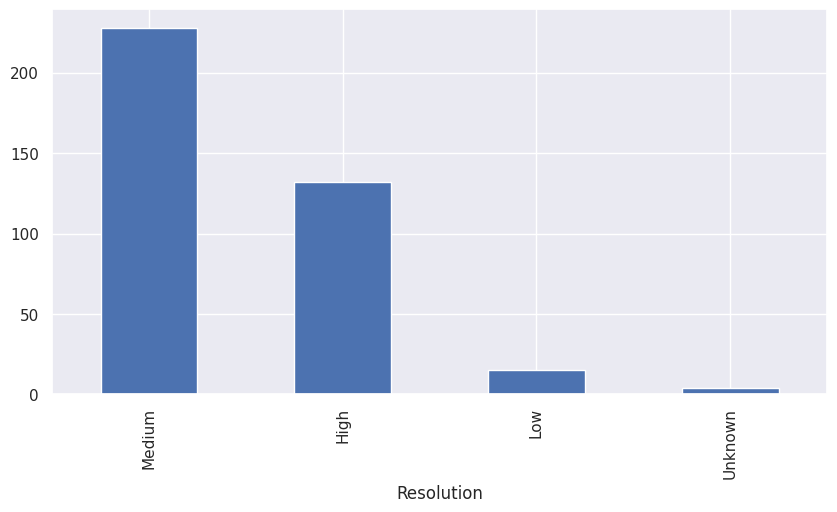

In [92]:
plt.figure(figsize=(10,5))
df['Resolution'].value_counts().plot(kind='bar')

# Segment Battery Life Days

In [93]:
df['Battery Life (days)'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', nan, '70',
       '1', '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [94]:
def segment_battery_life(battery_life):
    if pd.isnull(battery_life):
        return 'Unknown'
    elif battery_life == '48 hours':
        return '1-10'
    elif battery_life == '1.5':
        return '1-10'
    elif battery_life == 'Unlimited':
        return '>30'
    else:
        try:
            days = int(battery_life)
            if days >= 1 and days <= 10:
                return '1-10'
            elif days >= 11 and days <= 20:
                return '11-20'
            elif days >= 21 and days <= 30:
                return '21-30'
            else:
                return '>30'
        except ValueError:
            return 'Unknown'

df['Battery Life (days)'] = df['Battery Life (days)'].apply(segment_battery_life)

<Axes: xlabel='Battery Life (days)'>

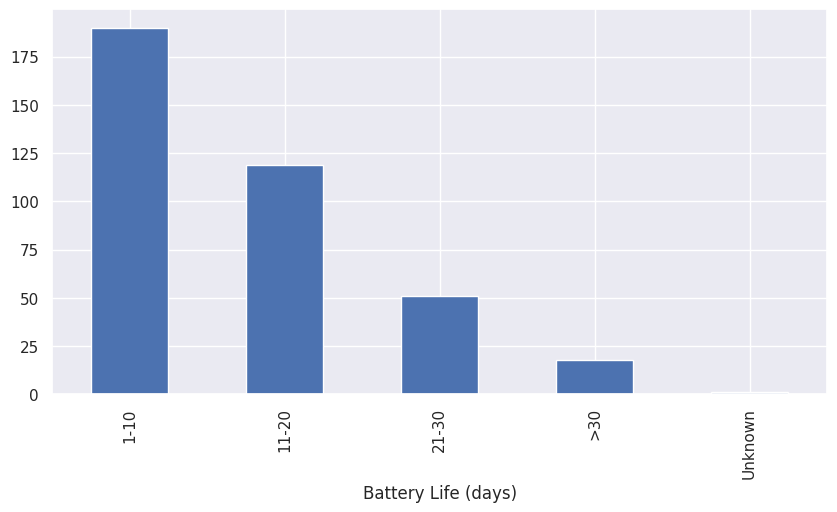

In [95]:
plt.figure(figsize=(10,5))
df['Battery Life (days)'].value_counts().plot(kind='bar')

# Segment Water Resistance (meters)

In [96]:
df['Water Resistance (meters)'].unique()

array(['50', '30', '100', '1.5', nan, 'Not specified', '200', '10'],
      dtype=object)

In [97]:
def segment_water_resistance(water_resistance):
    if pd.isnull(water_resistance) or water_resistance == 'Not specified':
        return 'Unknown'
    elif water_resistance == '1.5':
        return 'Splash resistant'
    else:
        depth = int(water_resistance)
        if depth >= 0 and depth <= 50:
            return '50m or less'
        elif depth > 50 and depth <= 100:
            return '51m - 100m'
        else:
            return 'More than 100m'


df['Water Resistance (meters)'] = df['Water Resistance (meters)'].apply(segment_water_resistance)

<Axes: xlabel='Water Resistance (meters)'>

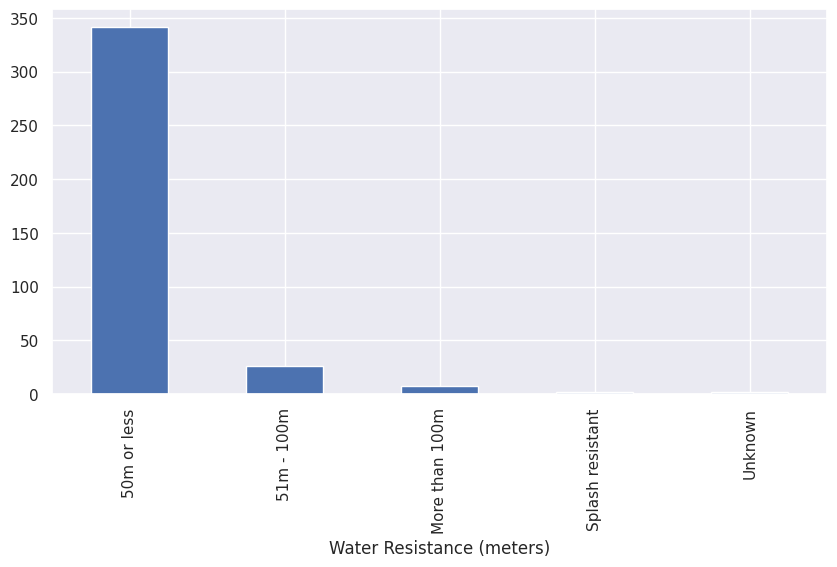

In [98]:
plt.figure(figsize=(10,5))
df['Water Resistance (meters)'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

In [99]:
#Check ther number of unique value
df.select_dtypes(include='object').nunique()

,0
Brand,13
Operating System,8
Connectivity,5
Display Type,9
Resolution,4
Water Resistance (meters),5
Battery Life (days),5
GPS,2
NFC,2


<ipython-input-100-16b9b0a7b36e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-100-16b9b0a7b36e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-100-16b9b0a7b36e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-100-16b9b0a7b36e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-100-16b9b0a7b36e>:12: UserWarning: set_ticklabels() should only be us

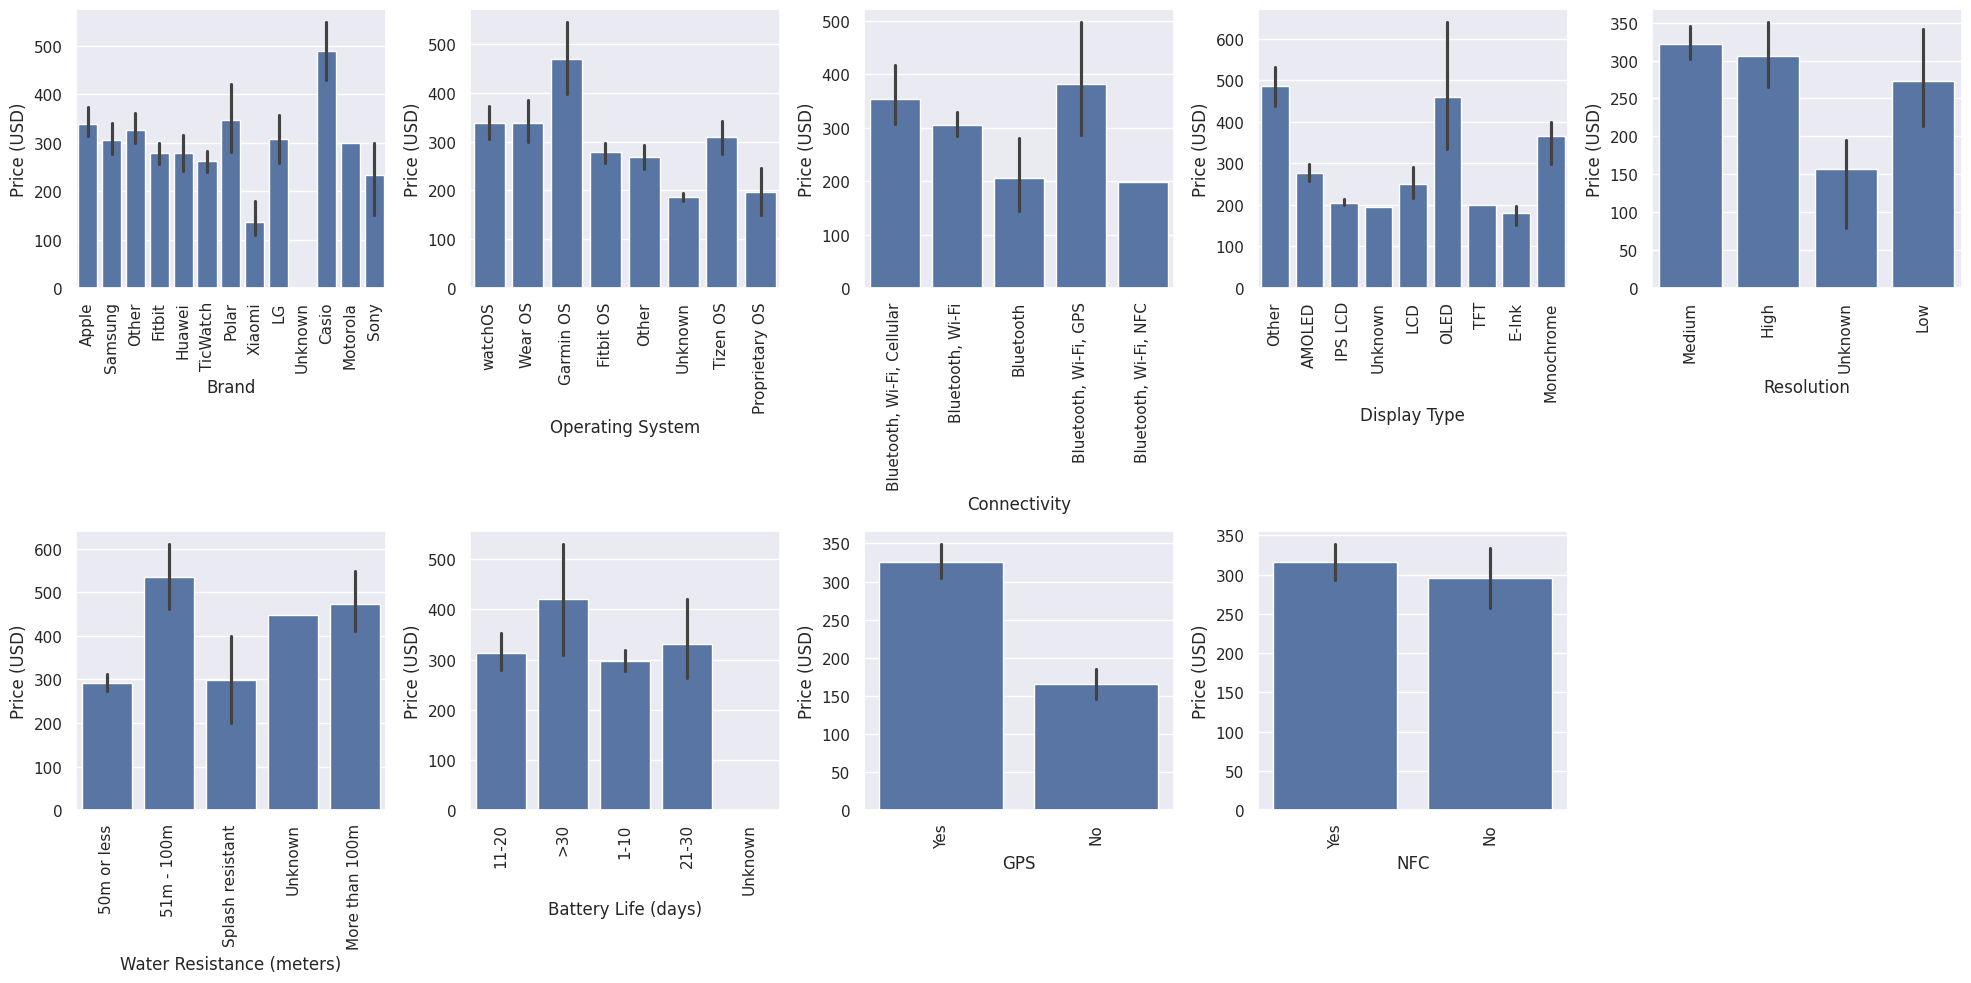

In [100]:
# list of categorical variables to plot
cat_vars = ['Brand', 'Operating System', 'Connectivity', 'Display Type', 'Resolution',
            'Water Resistance (meters)', 'Battery Life (days)', 'GPS', 'NFC']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price (USD)', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the tenth subplot
fig.delaxes(axs[9])

# show plot
plt.show()

<Axes: xlabel='Display Size (inches)'>

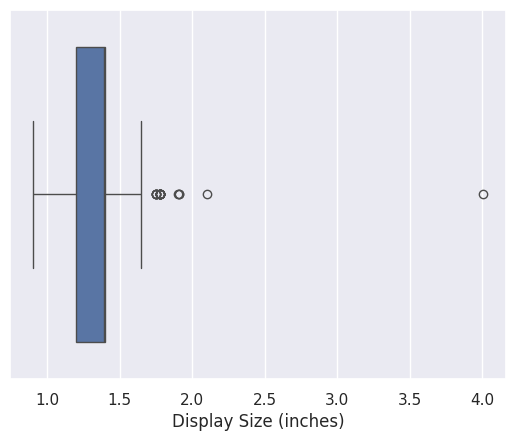

In [101]:
sns.boxplot(x=df["Display Size (inches)"])

<Axes: xlabel='Display Size (inches)'>

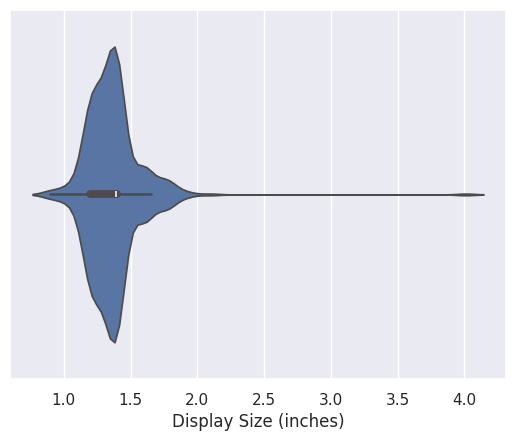

In [102]:
sns.violinplot(x=df["Display Size (inches)"])

<Axes: xlabel='Display Size (inches)', ylabel='Count'>

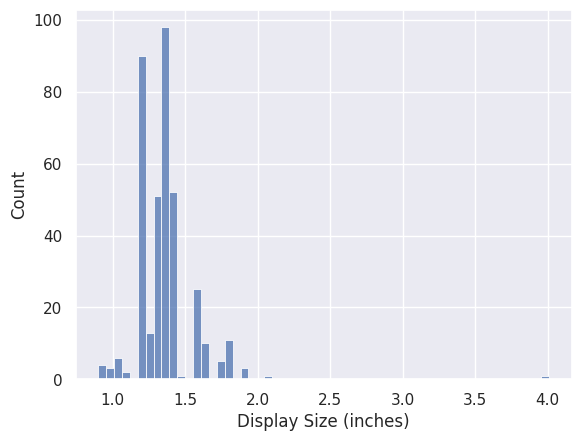

In [103]:
sns.histplot(data=df, x="Display Size (inches)")

# Data Preprocessing Part 2

In [104]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

,0
Display Size (inches),0.791557
Connectivity,0.263852
GPS,0.263852
NFC,0.263852
Price (USD),0.263852


In [105]:
df.dropna(inplace=True)
df.shape

(376, 11)

In [106]:
#Check the missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

,0


# Label Encoding for Object datatypes

In [107]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Brand: ['Apple' 'Samsung' 'Other' 'Fitbit' 'Huawei' 'TicWatch' 'Polar' 'Xiaomi'
 'LG' 'Casio' 'Motorola' 'Sony']
Operating System: ['watchOS' 'Wear OS' 'Garmin OS' 'Fitbit OS' 'Other' 'Unknown' 'Tizen OS'
 'Proprietary OS']
Connectivity: ['Bluetooth, Wi-Fi, Cellular' 'Bluetooth, Wi-Fi' 'Bluetooth'
 'Bluetooth, Wi-Fi, GPS' 'Bluetooth, Wi-Fi, NFC']
Display Type: ['Other' 'AMOLED' 'IPS LCD' 'LCD' 'OLED' 'TFT' 'E-Ink' 'Monochrome']
Resolution: ['Medium' 'High' 'Low' 'Unknown']
Water Resistance (meters): ['50m or less' '51m - 100m' 'Splash resistant' 'Unknown' 'More than 100m']
Battery Life (days): ['11-20' '>30' '1-10' '21-30']
GPS: ['Yes' 'No']
NFC: ['Yes' 'No']


In [108]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Brand: [ 0  8  6  2  3 10  7 11  4  1  5  9]
Operating System: [7 6 1 0 2 5 4 3]
Connectivity: [2 1 0 3 4]
Display Type: [6 0 2 3 5 7 1 4]
Resolution: [2 0 1 3]
Water Resistance (meters): [0 1 3 4 2]
Battery Life (days): [1 3 0 2]
GPS: [1 0]
NFC: [1 0]


# Remove Outliers using Z-Score

In [109]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [110]:
selected_cols = ['Display Size (inches)']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(374, 11)

# Correlation Heatmap

<Axes: >

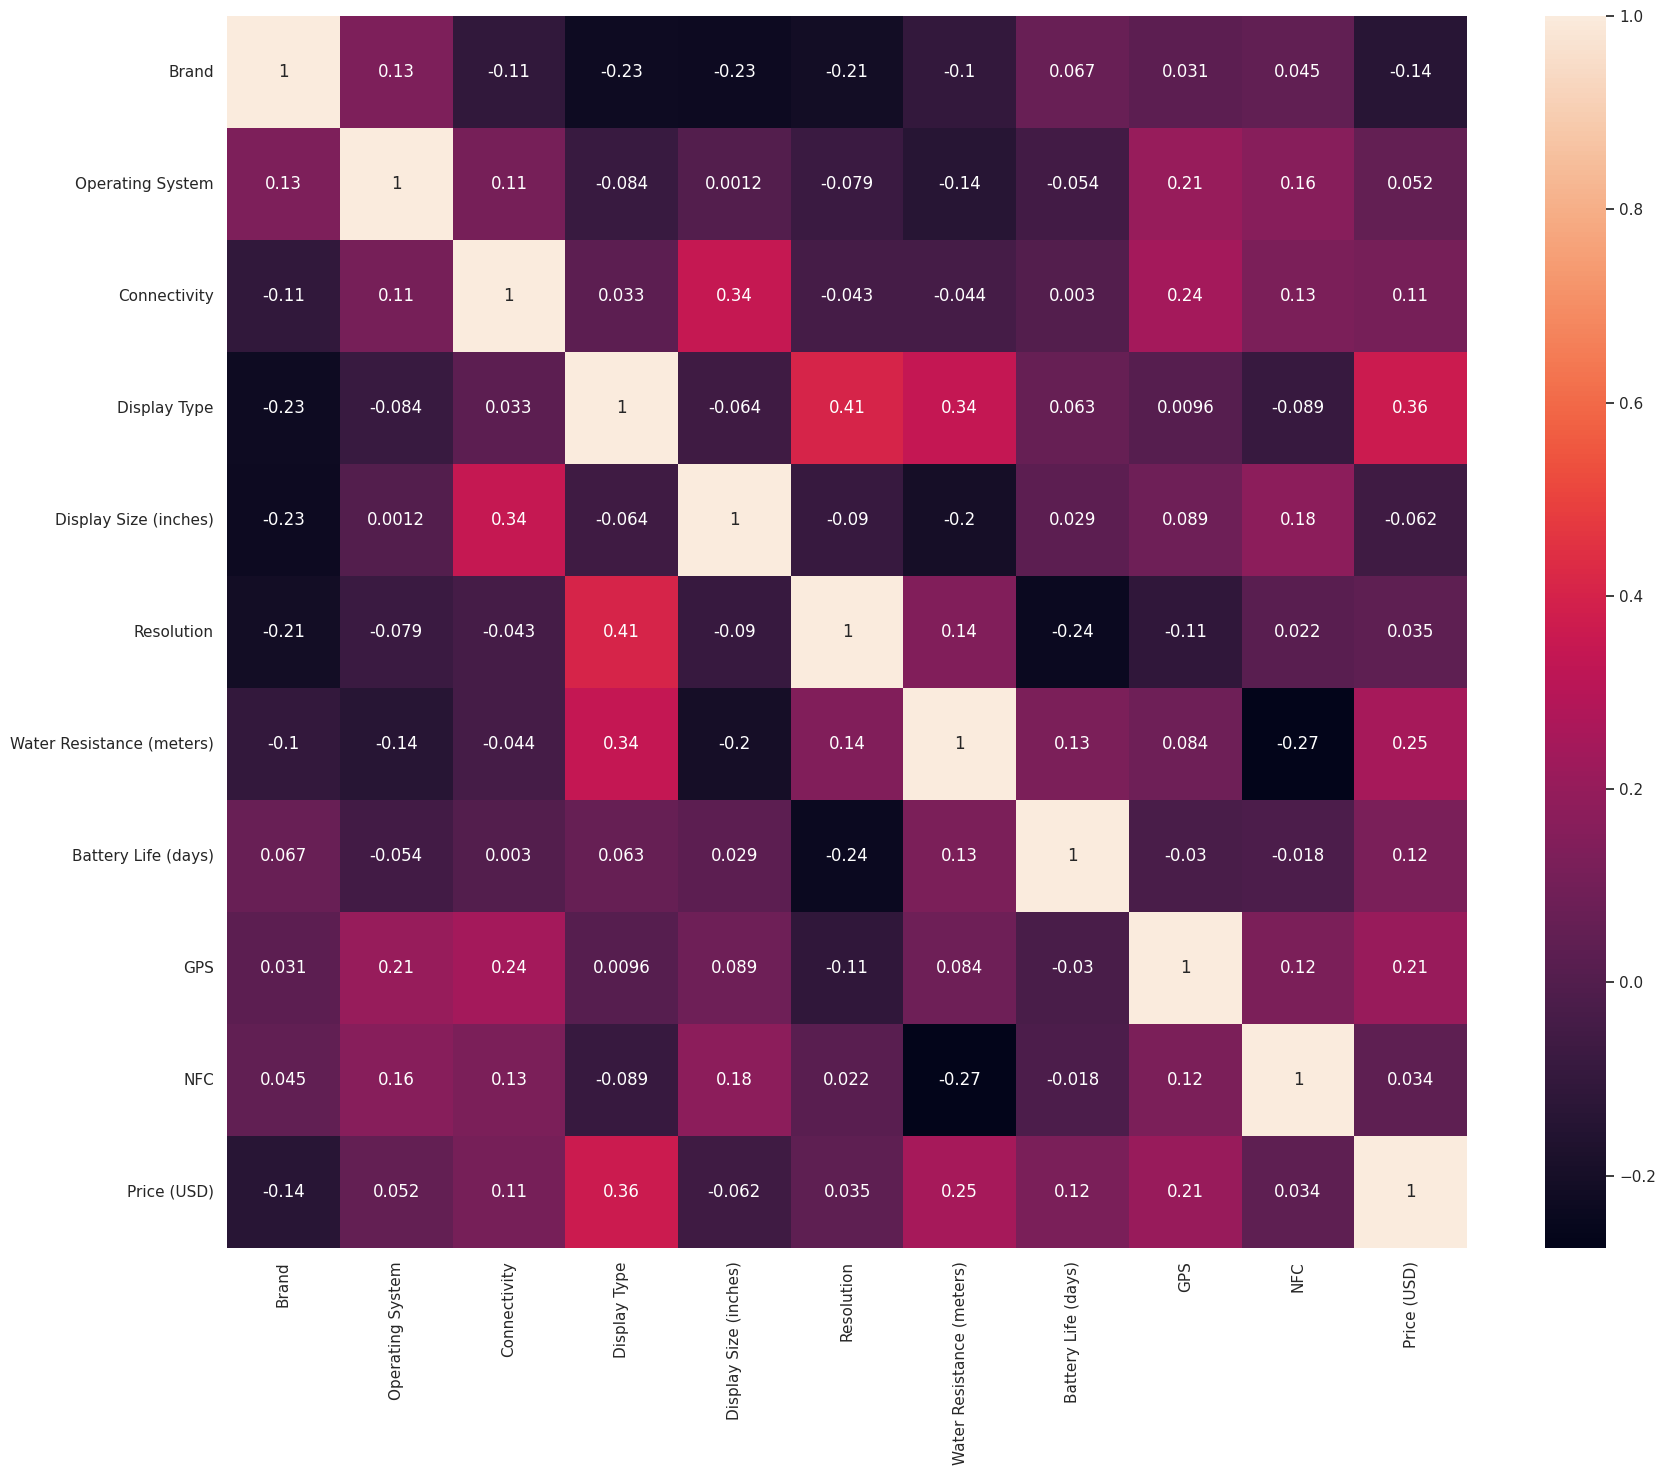

In [111]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

# Train Test Split

In [116]:
X = df_clean.drop('Price (USD)', axis=1)
y = df_clean['Price (USD)']

In [117]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

In [115]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=6)
dtree.fit(X_train, y_train)

InvalidParameterError: The 'max_features' parameter of DecisionTreeRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=7, min_samples_split=5, min_samples_leaf=2,
                           max_features='sqrt')
rf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])